<a href="https://colab.research.google.com/github/blue-qu/AMJAD_LAMA_MAHA_LINA_371_CS340_CS361/blob/main/CS340_CS361_PROJECT_371.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Introduction**

An informed search algorithm contains an array of knowledge such as how far we are from the goal, path cost, how to reach to the goal node, etc. This knowledge help agents to explore less to the search space and find more efficiently the goal node.

You may remember the maze game from childhood where a player starts from one place and ends up at another destination via a series of steps. This game is also known as the rat maze problem.
In this problem, there is a given maze of size N x N. The source and the destination location are the top-left cell and bottom-right cell respectively. Some cells are valid to move and some cells are blocked. If one rat starts moving from the start vertex to destination vertex, we must find that is there any way to complete the path, if it is possible then mark the correct path for the rat.

So, we used pymaze module and solved it using A-star (A*) algorithm.

The main purpose of pyamaze module, is to assist in generating customized random mazes and be able to work on that, like applying the algorithm efficiently. By using this module, you don’t need to program the GUI and you don’t need the Object-Oriented Programming since the module will provide you the support. This module uses the Tkinter GUI framework which is built-in in Python, and you don’t need to install any framework to use this module.

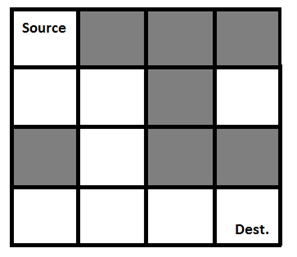
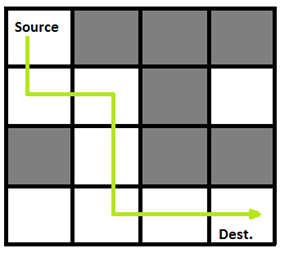

## **•	Maze:**
A maze is a two-dimensional matrix with certain cells/blocks blocked. One of the cells is referred to as a
source cell, and it is from this cell that we must begin. Another is referred to as a destination cell, which is
where we must arrive. We must find a path from the source to the destination that does not pass through any
of the blocked cells.

Given our example:
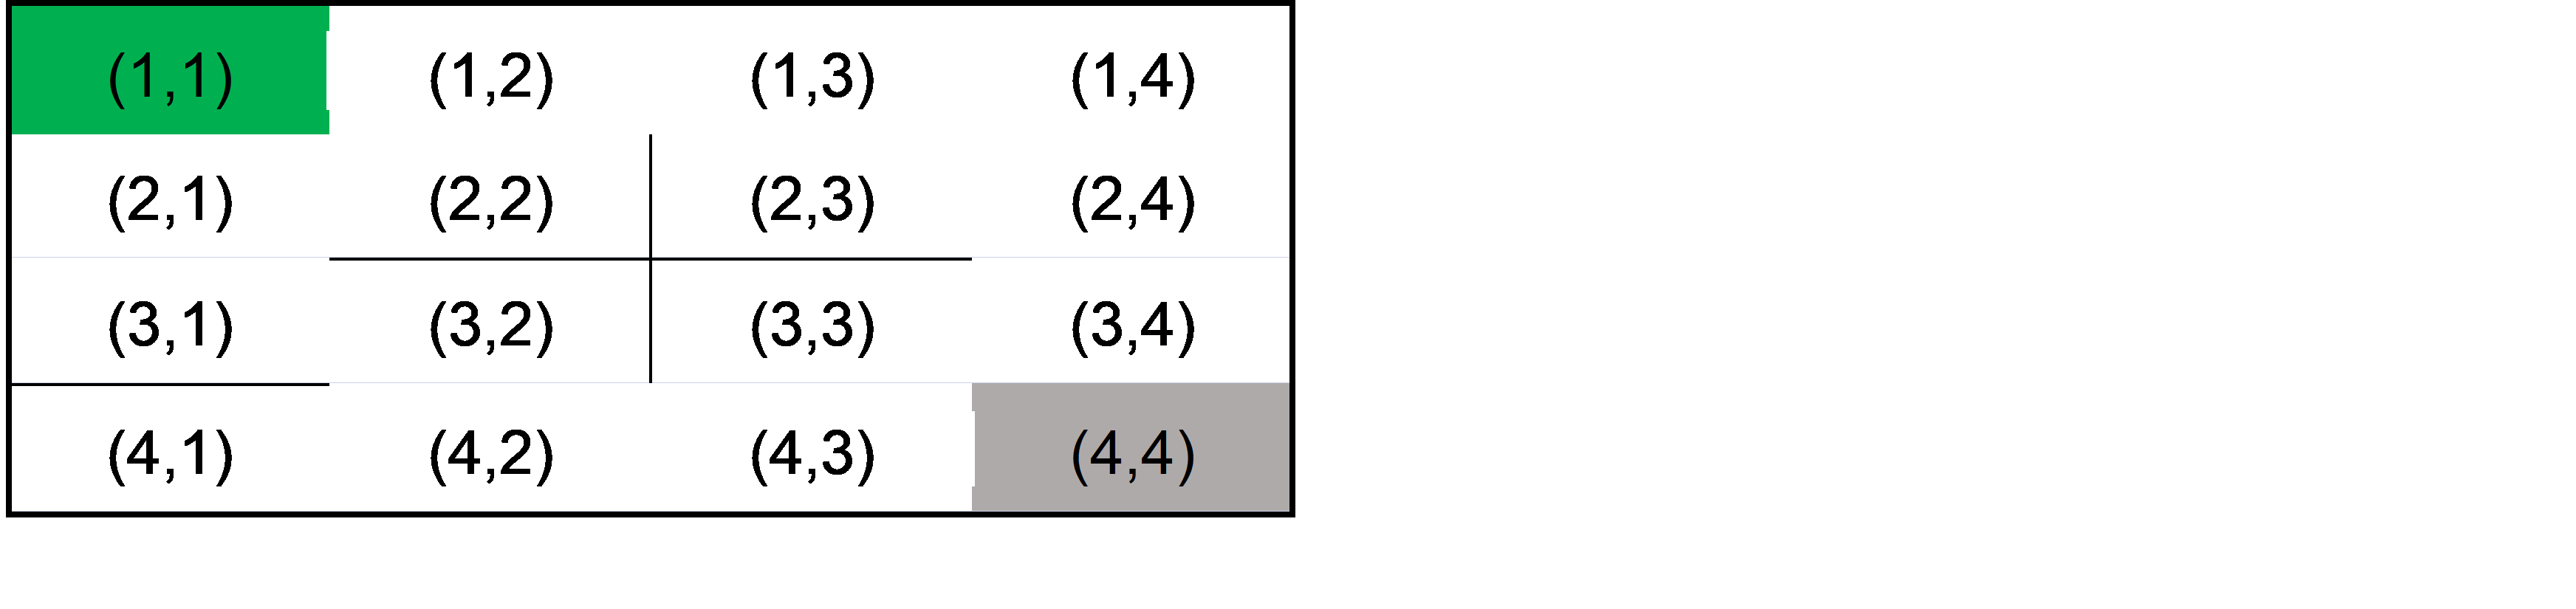

As we are working with A*, the algorithm will assign a cost for every cell in the given maze above and then it will select the path with the minimum cost, where (4,4) is the starting point and (1,1) is our destination.
The cost of a cell (n) is defined as:
F(n)= g(n)+h(n) Where:
-	f(n) is the estimated lowest cost to reach the cell (n)
-	g(n) is the actual cost to reach cell n from the start cell
-	h(n) is the heuristic cost to reach to the goal cell from cell n. It is the estimated cost to reach the goal cell from cell n.

Applying on the following case for better understanding g(n) and h(n):
 


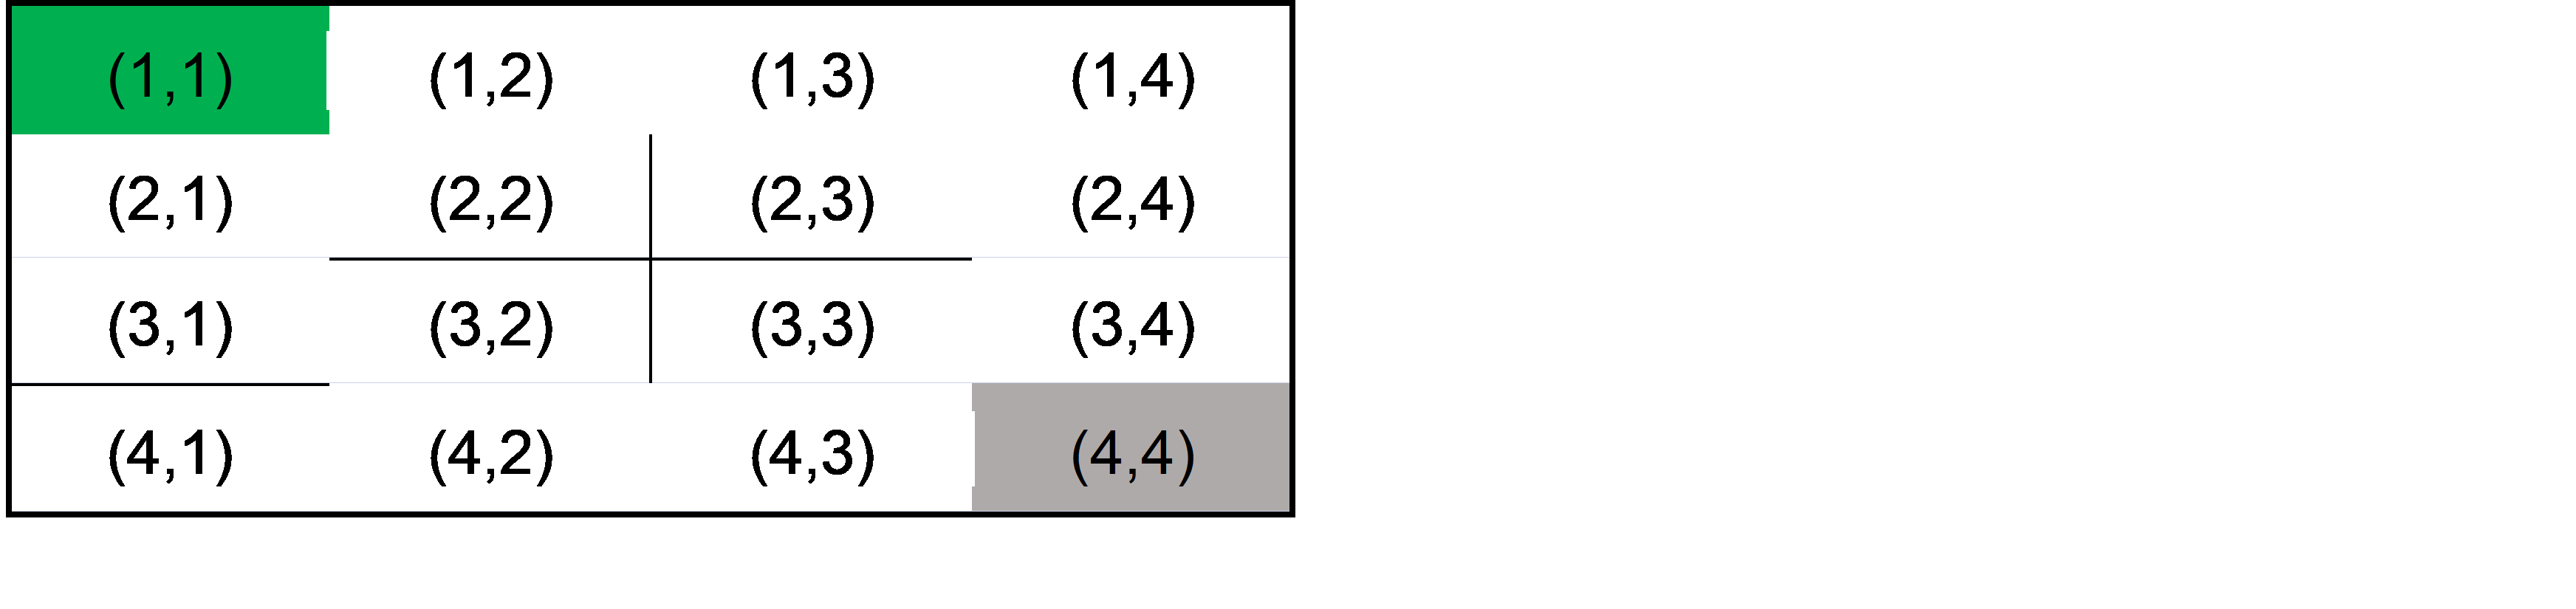

-	The g(n) cost for (4,4) is zero, since it is the starting point.
-	The h(n) is the estimated cost to reach the goal cell (1,1) from the cell (4,4).
And by using Manhattan Distance as our heuristic function, we will find the Manhattan distance between cell (4,4) and the goal cell which is 6

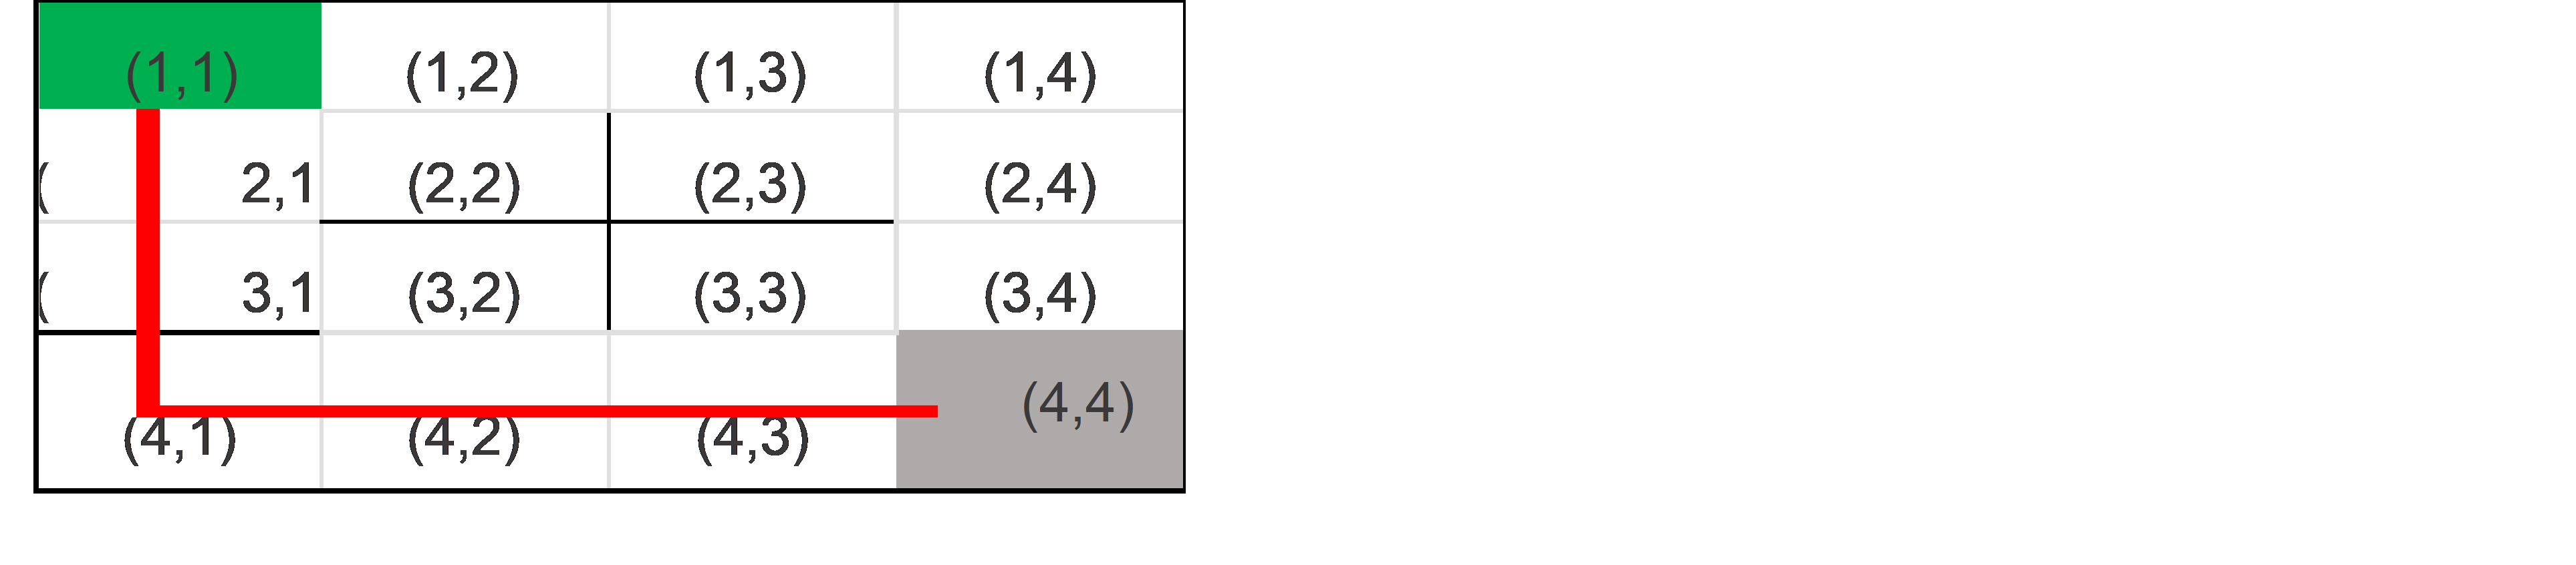

Therefore, the total cost of cell (4,4) is:
 f(n)=g(n)+h(n)=0+6=6
we will assume the cost of the cells left is infinity since they are unknown, then explore adjacent cells of (4,4) and calculate their cost.

A* Algorithm will choose the cell with the lowest cost for the next movement and since it has one adjacent cell only, for this case is cell (3,4) and hence it will move there.

Taking the 3 adjacent cells of cell (3,4), we will calculate their costs and again choose the one with the lowest cost. Repeat the process until we reach the goal point.

# •	Problem formulation:
-	Initial state:
A particular point in the maze
-	Actions:
South, north, east, and west
-	State space:
The location of the current cell and the state of visited paths
-	Goal test:
Reach the destination cell to exit




# **•	The Algorithm:**

A-Star Search Algorithm

is used to find the shortest path between the source and destination on image that represents a maze.
Finding a path through a maze is a basic computer science problem that can take many forms.
The A* algorithm is widely used in pathfinding and graph traversal.
Algorithm steps
-	Step1: Place the starting node in the OPEN list.
-	Step 2: Check if the OPEN list is empty or not, if the list is empty then return failure and stops.
-	Step 3: Select the node from the OPEN list which has the smallest value of evaluation function (g + h), if node n is the goal node, then return success and stop, otherwise
-	Step 4: Expand node n and generate all its successors and put n into the closed list. For each successor n', check whether n' is already in the OPEN or CLOSED list, if not then compute the evaluation function for n' and place it into the Open list.
 
-	Step 5: Else if node n' is already in OPEN and CLOSED, then it should be attached to the back pointer which reflects the lowest g(n') value.
-	Step 6: Return to Step 2.


•	Implementation steps:

First, we use the pymaze module which is already provided in the python library, and we import it at the first step on our code. Second, from queue module, we import Priority Queue because we want to choose a cell with minimum cost to implement A* algorithm. Then, we implement A* function which we explained it before.
To make the code clear you must know important information which is the maze arguments. The maze argument is:
-	rows: The number of rows in the maze will be returned by m.rows.
-	cols: m.cols returns the number of columns in the maze.
-	grid: m.grid returns a list of all the maze's cells.
-	maze map: m.maze map returns a dictionary containing information about the maze's open and closed walls. The cell will serve as the keys, and the value will be a dictionary including information from four walls in the directions of East, West, North, and South.
At the end of the code, we print the graph of the maze as well as the length of the path.


# **Test the algorithm:**

In [ ]:
def h(cell1,cell2):
    x1,y1=cell1
    x2,y2=cell2

    return abs(x1-x2) + abs(y1-y2)


# **•	The code:**

In [ ]:
from pyamaze import maze,agent,textLabel from queue import PriorityQueue
def h(cell1,cell2): x1,y1=cell1 x2,y2=cell2

return abs(x1-x2) + abs(y1-y2) def aStar(m):
start=(m.rows,m.cols) g_score={cell:float('inf') for cell in m.grid} g_score[start]=0
f_score={cell:float('inf') for cell in m.grid} f_score[start]=h(start,(1,1))

open=PriorityQueue() open.put((h(start,(1,1)),h(start,(1,1)),start)) aPath={}
while not open.empty(): currCell=open.get()[2] if currCell==(1,1):
break
for d in 'ESNW':
if m.maze_map[currCell][d]==True: if d=='E':
childCell=(currCell[0],currCell[1]+1) if d=='W':
childCell=(currCell[0],currCell[1]-1) if d=='N':
childCell=(currCell[0]-1,currCell[1])
if d=='S':
childCell=(currCell[0]+1,currCell[1])

temp_g_score=g_score[currCell]+1 temp_f_score=temp_g_score+h(childCell,(1,1))

if temp_f_score < f_score[childCell]: g_score[childCell]= temp_g_score f_score[childCell]= temp_f_score
open.put((temp_f_score,h(childCell,(1,1)),childCell)) aPath[childCell]=currCell
fwdPath={} cell=(1,1)
while cell!=start: fwdPath[aPath[cell]]=cell cell=aPath[cell]
return fwdPath

if name ==' main ': m=maze(5,5) m.CreateMaze() path=aStar(m)

a=agent(m,footprints=True) m.tracePath({a:path})
l=textLabel(m,'A Star Path Length',len(path)+1)

m.run()


Run:

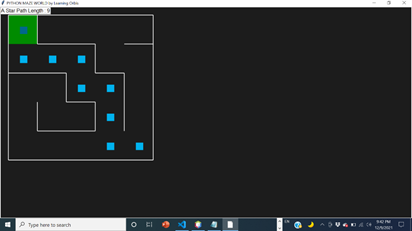

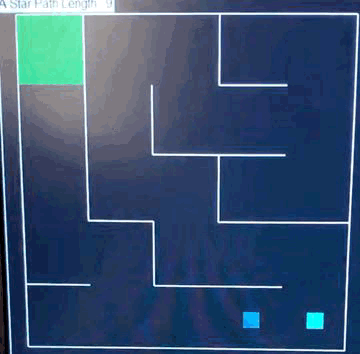

# **المقدمة:**
ﺗ
ﺤﺘﻮي ﺧﻮارزﻣﯿﺔ اﻟﺒﺤﺚ اﻟﻤﺴﺘﻨﯿﺮة ﻋﻠﻰ ﻣﺠﻤﻮﻋﺔ ﻣﻦ اﻟﻤﻌﺮﻓﺔ ﻣﺜﻞ ﻣﺪى ﺑُﻌﺪﻧﺎ ﻋﻦ 
اﻟﮭﺪف ، وﺗﻜﻠﻔﺔ اﻟﻤﺴﺎر ، وﻛﯿﻔﯿﺔ اﻟﻮﺻﻮل إﻟﻰ ﻋﻘﺪة اﻟﮭﺪف ، وﻣﺎ إﻟﻰ ذﻟﻚ. ﺗﺴﺎﻋﺪ ھﺬه اﻟﻤﻌﺮﻓﺔ اﻟﻮﻛﻼء ﻋﻠﻰ ﺗﻘﻠﯿﻞ اﺳﺘﻜﺸﺎف ﻣﺴﺎﺣﺔ اﻟﺒﺤﺚ واﻟﻌﺜﻮر ﻋﻠﻰ ﻋﻘﺪة اﻟﮭﺪف
ﺑﻜﻔﺎءة أﻛﺒﺮ.

ﻗﺪ ﺗﺘﺬﻛﺮ ﻟﻌﺒﺔ اﻟﻤﺘﺎھﺔ ﻣﻨﺬ اﻟﻄﻔﻮﻟﺔ ﺣﯿﺚ ﯾﺒﺪأ اﻟﻼﻋﺐ ﻣﻦ ﻣﻜﺎن وﯾﻨﺘﮭﻲ ﻓﻲ وﺟﮭﺔ أﺧﺮى ﻋﺒﺮ ﺳﻠﺴﻠﺔ ﻣﻦ اﻟﺨﻄﻮات.  ﺗُﻌﺮف ھﺬه
اﻟﻠﻌﺒﺔ أﯾﻀﺎ ﺑﺎﺳﻢ ﻣﺸﻜﻠﺔ ﻣﺘﺎھﺔ اﻟﻔﺌﺮان.
ﻓﻲ ھﺬه اﻟﻤﺸﻜﻠﺔ ، ﺗﻮﺟﺪ ﻣﺘﺎھﺔ ﻣﻌﯿﻨﺔ ﺑﺤﺠﻢ N × .N اﻟﻤﺼﺪر واﻟﻤﻮﻗﻊ اﻟﻮﺟﮭﺔ ھﻤﺎ اﻟﺨﻠﯿﺔ اﻟﻌﻠﻮﯾﺔ اﻟﯿﺴﺮى واﻟﺨﻠﯿﺔ اﻟﯿﻤﻨﻰ اﻟﺴﻔﻠﯿﺔ ﻋﻠﻰ اﻟﺘﻮاﻟﻲ.  ﺑﻌﺾ اﻟﺨﻼﯾﺎ ﺻﺎﻟﺤﺔ ﻟﻠﺘﺤﺮك وﺑﻌﺾ اﻟﺨﻼﯾﺎ ﻣﺤﻈﻮرة. إذا ﺑﺪأ ﻓﺄر واﺣﺪ ﻓﻲ اﻟﺘﺤﺮك ﻣﻦ ﻗﻤﺔ اﻟﺒﺪاﯾﺔ إﻟﻰ ﻗﻤﺔ
اﻟﻮﺟﮭﺔ ، ﯾﺠﺐ أن ﻧﺠﺪ أن ھﻨﺎك أي طﺮﯾﻘﺔ ﻹﻛﻤﺎل اﻟﻤﺴﺎر ، إذا ﻛﺎن ذﻟﻚ ﻣﻤﻜﻨًﺎ ، ﻓﻘﻢ ﺑﺘﺤﺪﯾﺪ اﻟﻤﺴﺎر اﻟﺼﺤﯿﺢ ﻟﻠﻔﺄر.

pymaze ﻟﺬﻟﻚ ، اﺳﺘﺨﺪﻣﻨﺎ وﺣﺪة 

.A-star وﻗﻤﻨﺎ ﺑﺤﻠﮭﺎ ﺑﺎﺳﺘﺨﺪام ﺧﻮارزﻣﯿﺔ
 

pyamaze اﻟﻐﺮض اﻟﺮﺋﯿﺴﻲ ﻣﻦ وﺣﺪة 
، ھﻮ اﻟﻤﺴﺎﻋﺪة ﻓﻲ إﻧﺸﺎء ﻣﺘﺎھﺎت ﻋﺸﻮاﺋﯿﺔ ﻣﺨﺼﺼﺔ واﻟﻘﺪرة ﻋﻠﻰ اﻟﻌﻤﻞ ﻋﻠﻰ ذﻟﻚ ، ﻣﺜﻞ ﺗﻄﺒﯿﻖ اﻟﺨﻮارزﻣﯿﺔ ﺑﻜﻔﺎءة. ﺑﺎﺳﺘﺨﺪام ھﺬه اﻟﻮﺣﺪة ، ﻟﻦ ﺗﺤﺘﺎج إﻟﻰ ﺑﺮﻣﺠﺔ واﺟﮭﺔ اﻟﻤﺴﺘﺨﺪم اﻟﺮﺳﻮﻣﯿﺔ وﻟﺴﺖ ﺑﺤﺎﺟﺔ إﻟﻰ اﻟﺒﺮﻣﺠﺔ اﻟﺸﯿﺌﯿﺔ ﻷن اﻟﻮﺣﺪة ﺳﺘﻮﻓﺮ ﻟﻚ اﻟﺪﻋﻢ.
 GUI Tkinter ﺗﺴﺘﺨﺪم ھﺬه اﻟﻮﺣﺪة إطﺎر ﻋﻤﻞ 
 المدمج في بايثون ولا ﺗﺤﺘﺎج إﻟﻰ ﺗﺜﺒﯿﺖ أي إطﺎر ﻻﺳﺘﺨﺪام ھﺬه اﻟﻮﺣﺪه




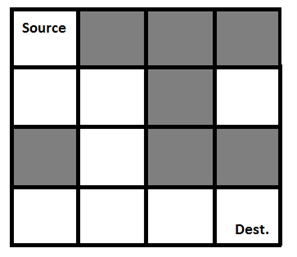
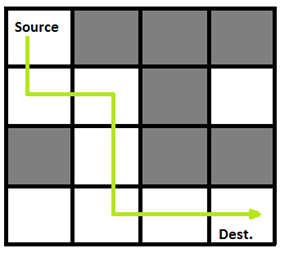

# **• اﻟﻤﺘﺎھﺔ:**

اﻟﻤﺘﺎھﺔ ھﻲ ﻋﺒﺎرة ﻋﻦ ﻣﺼﻔﻮﻓﺔ ﺛﻨﺎﺋﯿﺔ اﻷﺑﻌﺎد ﺗﺤﺘﻮي ﻋﻠﻰ ﺑﻌﺾ اﻟﺨﻼﯾﺎ / اﻟﻜﺘﻞ اﻟﻤﺤﻈﻮره . ﯾﺸﺎر إﻟﻰ إﺣﺪى اﻟﺨﻼﯾﺎ ﺑﺎﺳﻢ أ
وھﻲ ﺧﻠﯿﺔ اﻟﻤﺼﺪر ، وﻣﻦ ھﺬه اﻟﺨﻠﯿﺔ ﯾﺠﺐ أن ﻧﺒﺪأ. ﯾﺸﺎر إﻟﻰ اﻟﺨﻠﯿﺔ اﻷﺧﺮى ﻋﻠﻰ أﻧﮭﺎ ﺧﻠﯿﺔ اﻟﻮﺟﮭﺔ ، ﺣﯿﺚ ﯾﺠﺐ أن ﻧﺼﻞ.
ﯾﺠﺐ أن ﻧﺠﺪ طﺮﯾﻘًﺎ ﻣﻦ اﻟﻤﺼﺪر إﻟﻰ اﻟﻮﺟﮭﺔ ﻻ ﯾﻤﺮ اي ﻣﻨﮭﺎ
ﻣﻦ اﻟﺨﻼﯾﺎ اﻟﻤﺤﻈﻮرة.

ﺑﺎﻟﻨﻈﺮ إﻟﻰ ﻣﺜﺎﻟﻨﺎ:


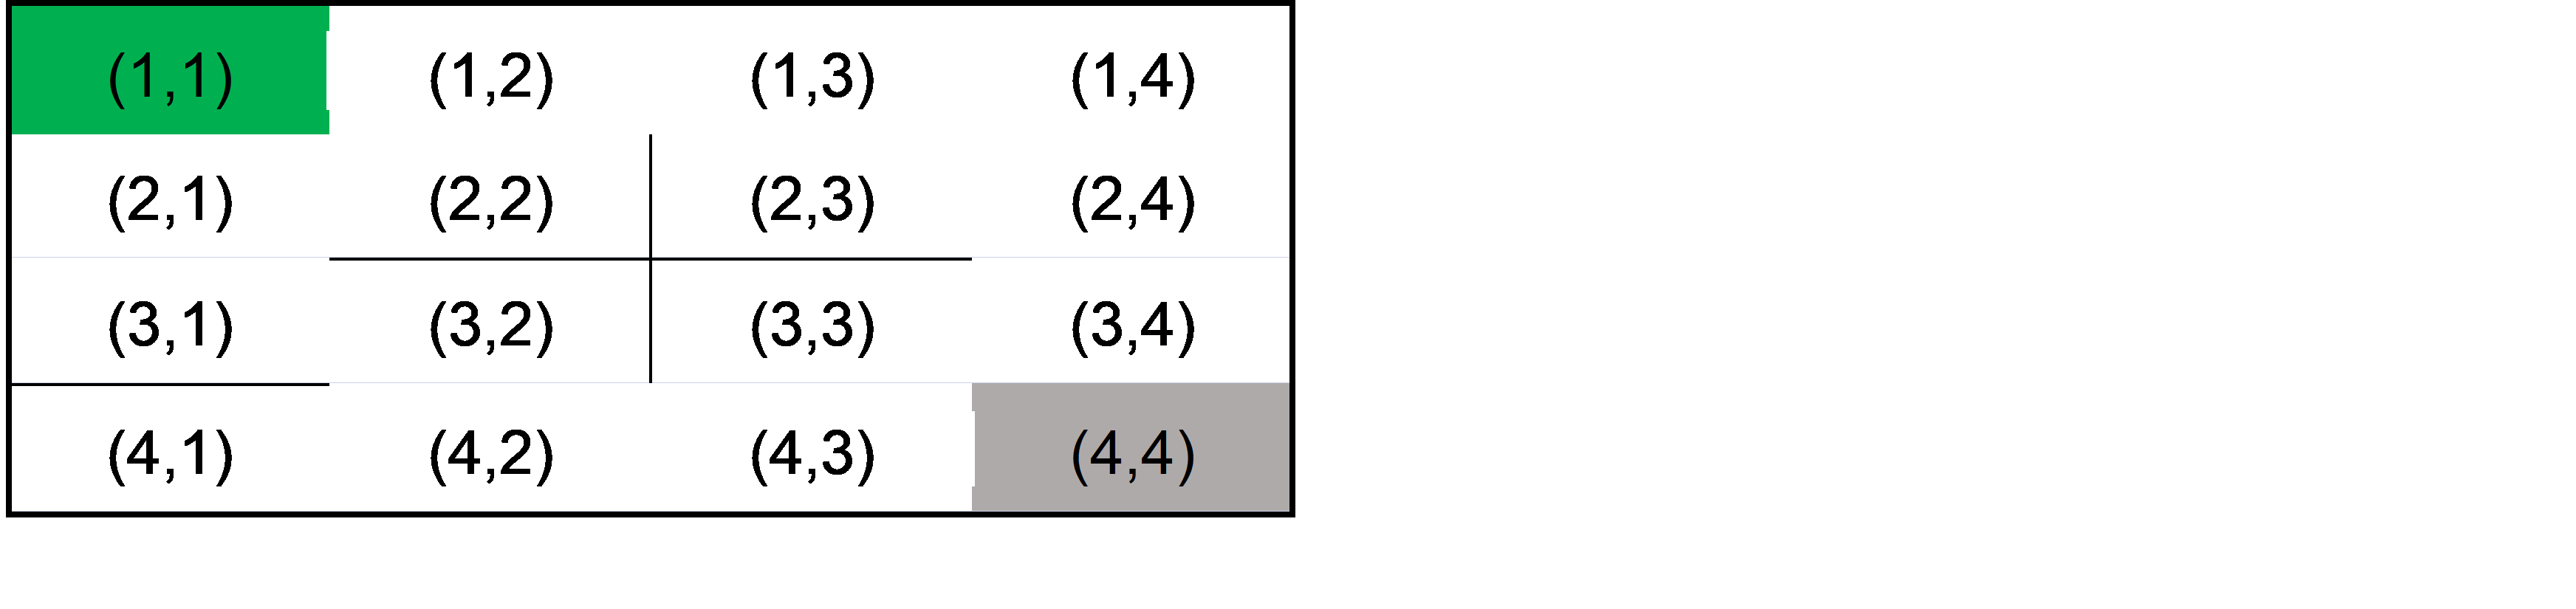

A * ﻧﻈ ًﺮا ﻷﻧﻨﺎ ﻧﻌﻤﻞ ﻣﻊ 
، ﺳﺘﺤﺪد اﻟﺨﻮارزﻣﯿﺔ ﺗﻜﻠﻔﺔ ﻛﻞ ﺧﻠﯿﺔ ﻓﻲ اﻟﻤﺘﺎھﺔ اﻟﻤﺤﺪدة أﻋﻼه ، ﺛﻢ ﺳﺘﺤﺪد اﻟﻤﺴﺎر اﻻﻗﻞ ﺗﻜﻠﻔﺔ

 ، ﺣﯿﺚ
  ٤،٤) ھﻲ ﻧﻘﻄﺔ اﻟﺒﺪاﯾﺔ (١،١) ھﻲ وجهتنا )
(n) ﯾﺘﻢ ﺗﻌﺮﯾﻒ ﺗﻜﻠﻔﺔ اﻟﺨﻠﯿﺔ
 ﻋﻠﻰ اﻟﻨﺤﻮ اﻟﺘﺎﻟﻲ:


F(n)= g(n)+h(n)
ﺣﯿﺚ أن:


-     f(n): .(n) ھﻲ أﻗﻞ ﺗﻜﻠﻔﺔ ﻣﻘﺪرة ﻟﻠﻮﺻﻮل إﻟﻰ اﻟﺨﻠﯿﺔ 
-     g(n): ھﻲ اﻟﺘﻜﻠﻔﺔ اﻟﻔﻌﻠﯿﺔ ﻟﻠﻮﺻﻮل إﻟﻰ اﻟﺨﻠﯿﺔ
 n ﻣﻦ ﺧﻠﯿﺔ اﻟﺒﺪاﯾﺔ.
-     h(n): ھﻲ اﻟﺘﻜﻠﻔﺔ اﻹرﺷﺎدﯾﺔ ﻟﻠﻮﺻﻮل nإﻟﻰ اﻟﺨﻠﯿﺔ اﻟﻤﺴﺘﮭﺪﻓﺔ ﻣﻦ اﻟﺨﻠﯿﺔ

إﻧﮭﺎ اﻟﺘﻜﻠﻔﺔ اﻟﻤﻘﺪرة ﻟﻠﻮﺻﻮل إﻟﻰ اﻟﺨﻠﯿﺔ
(n) اﻟﻤﺴﺘﮭﺪﻓﺔ ﻣﻦ اﻟﺨﻠﯿﺔ
ﻣﻦ أﺟﻞ ﻓﮭﻢ أﻓﻀﻞ
 (n) g و (n) :

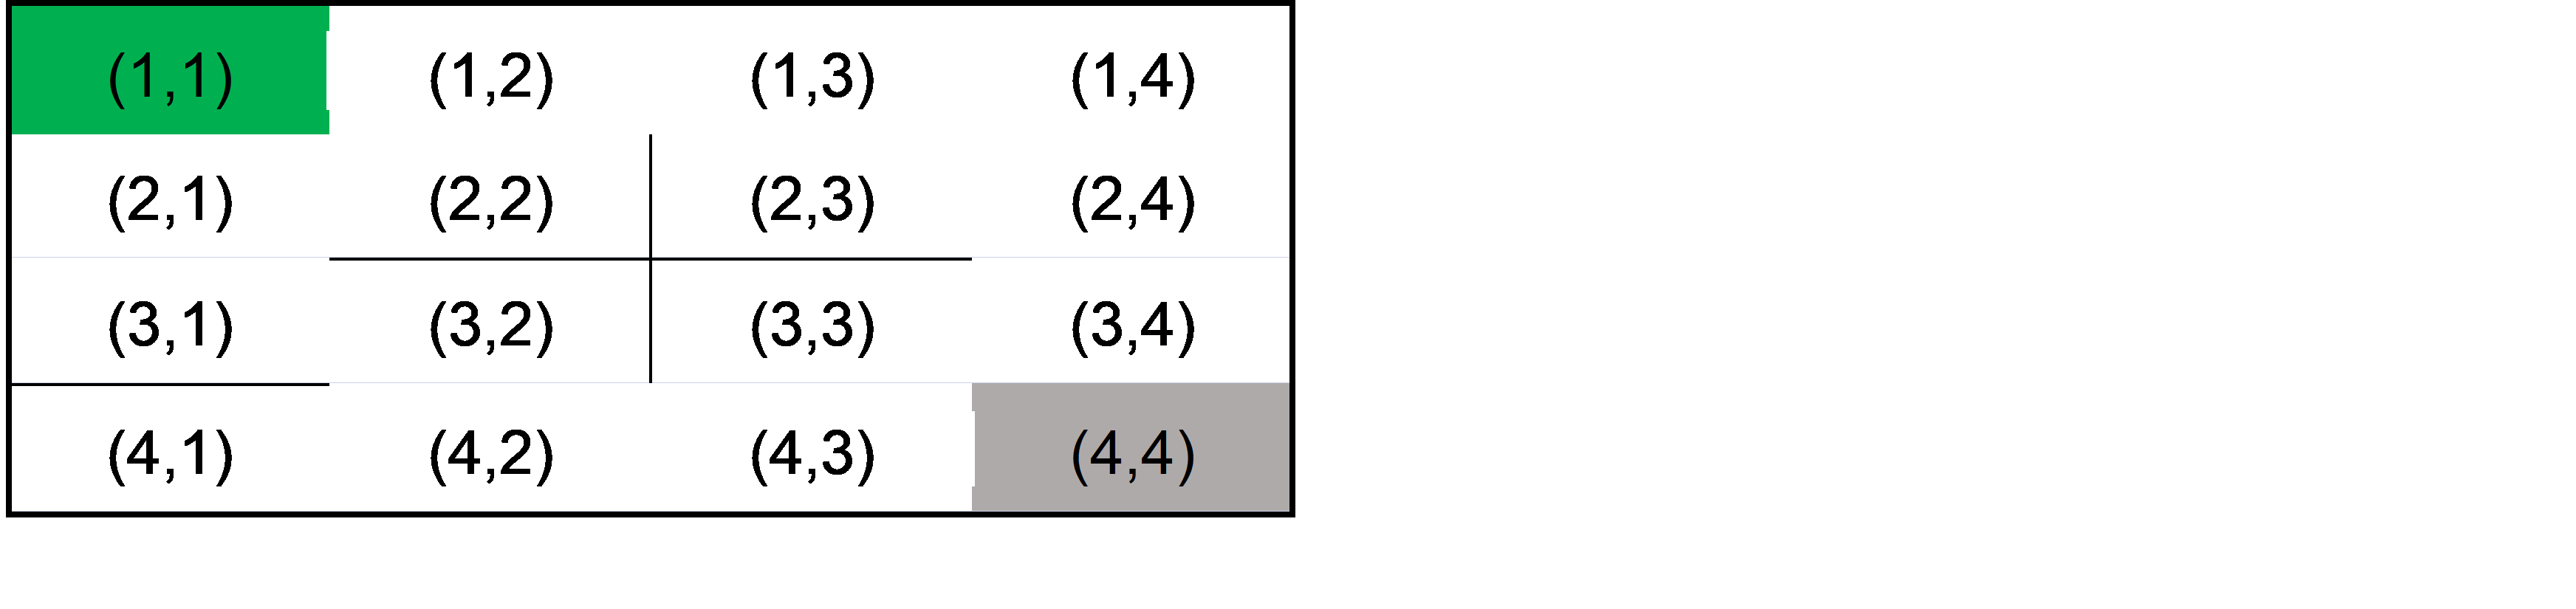
 ﺗﻜﻠﻔﺔ  ﻟ (٤.٤) ھﻲ ﺻﻔﺮ ، ﻷﻧﮭﺎ ﻧﻘﻄﺔ اﻟﺒﺪاﯾﺔ.
-     h(n) ھﻲ اﻟﺘﻜﻠﻔﺔ اﻟﻤﻘﺪرة ﻟﻠﻮﺻﻮل إﻟﻰ ﺧﻠﯿﺔ اﻟﮭدف (١،١) ﻣﻦ اﻟﺨﻠيه (٤.٤)


وﺑﺎﺳﺘﺨﺪام distance manhattan 
ﻛﻮظﯿﻔﺔ إرﺷﺎدﯾﺔ ، ﺳﻨﺠﺪ ﻣﺴﺎﻓﺔ ﻣﺎﻧﮭﺎﺗﻦ ﺑﯿﻦ اﻟﺨﻠﯿﺔ (٤.٤) وﺧﻠﯿﺔ اﻟﮭﺪف وھﻲ٦



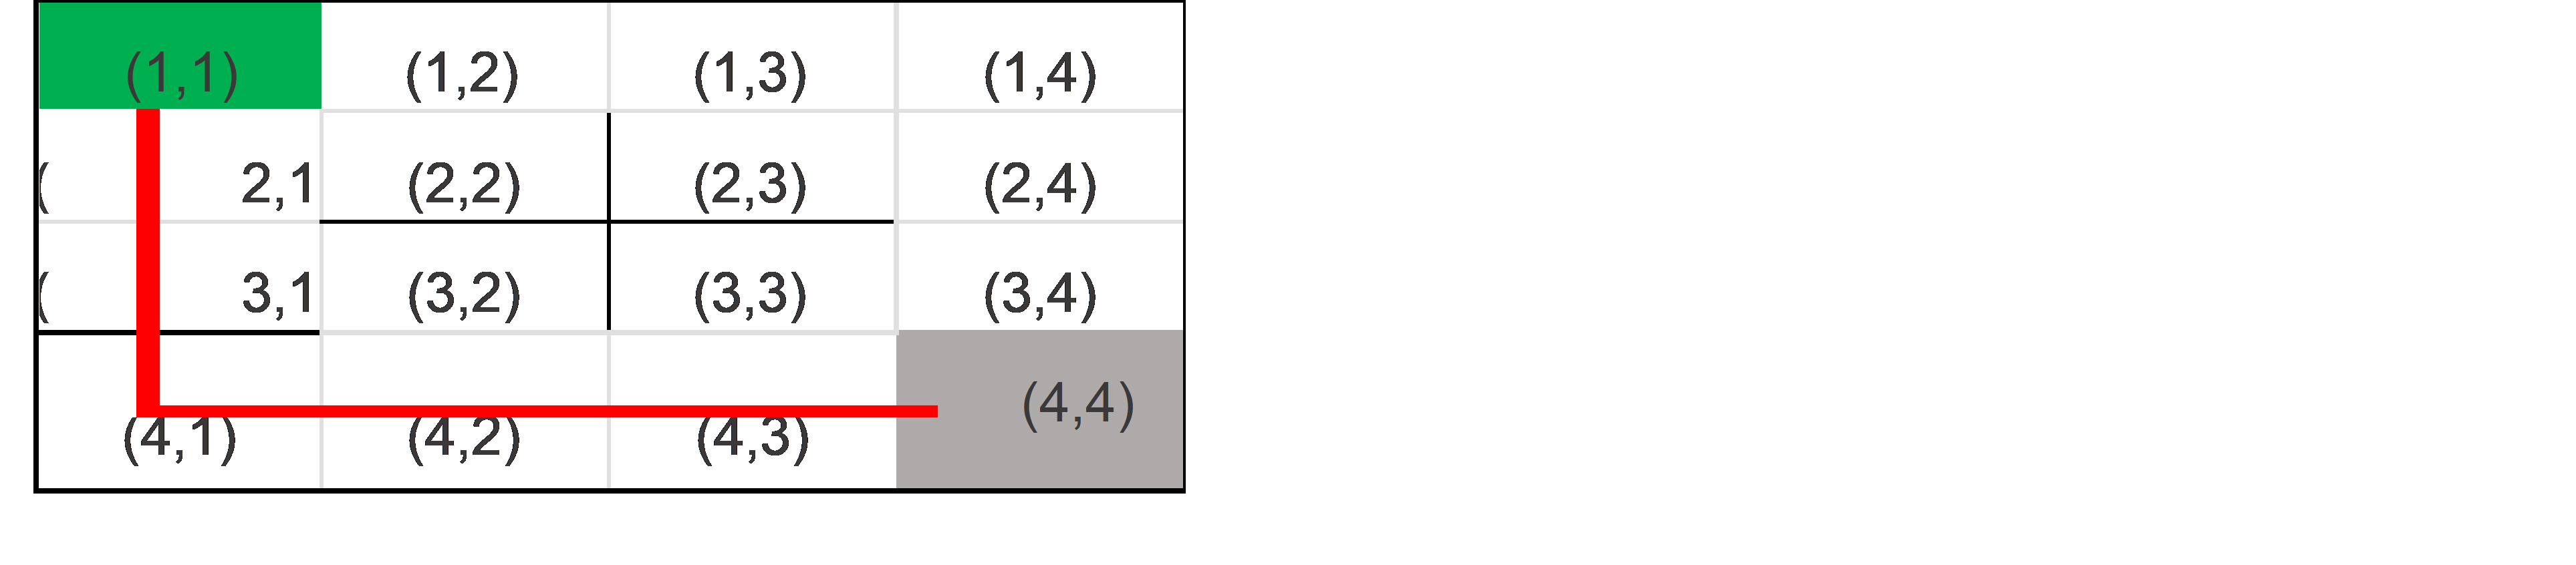

ﻟﺬﻟﻚ ، ﻓﺈن اﻟﺘﻜﻠﻔﺔ اﻹﺟﻤﺎﻟﯿﺔ ﻟﻠﺨﻠﯿﺔ ﻟﺬﻟﻚ ، ﻓﺈن اﻟﺘﻜﻠﻔﺔ اﻹﺟﻤﺎﻟﯿﺔ ﻟﻠﺨﻠﯿﺔ (٤.٤) هي 

f(n)=g(n)+h(n)
ﺑﺎﻟﺘﺎﻟﻲ: ٠+٦ =٦

ﺳﻨﻔﺘﺮض أن ﺗﻜﻠﻔﺔ اﻟﺨﻼﯾﺎ اﻟﻤﺘﺒﻘﯿﺔ ﻻ ﻧﮭﺎﺋﯿﺔ ﻷﻧﮭﺎ ﻏﯿﺮ ﻣﻌﺮوﻓﺔ ، ﺛﻢ ﻧﺴﺘﻜﺸﻒ اﻟﺨﻼﯾﺎ اﻟﻤﺠﺎورة ﻟـ (٤.٤) وﻧﺤﺴﺐ ﺗﻜﻠﻔﺘﮭﺎ.
A* ﺳﺘﺨﺘﺎر ﺧﻮارزﻣﯿﺔ
 اﻟﺨﻠﯿﺔ اﻷﻗﻞ ﺗﻜﻠﻔﺔ ﻟﻠﺤﺮﻛﺔ اﻟﺘﺎﻟﯿﺔ وﺑﻤﺎ أﻧﮭﺎ ﺗﺤﺘﻮي ﻋﻠﻰ ﺧﻠﯿﺔ واﺣﺪة ﻣﺠﺎورة ﻓﻘﻂ وھﻲ اﻟﺨﻠﯿﺔ(٤.٣(
ﺑﺎﻟﺘﺎﻟﻲ ﺳﺘﻨﺘﻘﻞ إﻟﻰ ھﻨﺎك.
 
ﺑﺄﺧﺬ اﻟﺨﻼﯾﺎ اﻟﺜﻼث اﻟﻤﺠﺎورة للخليه (٤.٣) ﺳﻨﺤﺴﺐ ﺗﻜﻠﻔﺘﮭﺎ وﻧﺨﺘﺎر ﻣﺮة أﺧﺮى وﺣﺪة ﺗﺤﺘﻮي ﻋﻠﻰ أﻗﻞ ﺗﻜﻠﻔﺔ. ﺳﻨﻜﺮر اﻟﻌﻤﻠﯿﺔ
ﺣﺘﻰ ﻧﺼﻞ إﻟﻰ ﻧﻘﻄﺔ اﻟﮭﺪف.


**• ﺻﯿﺎﻏﺔ اﻟﻤﺸﻜﻠﺔ:**


-   اﻟﺤﺎﻟﺔ اﻷوﻟﯿﺔ:
ﻧﻘﻄﺔ ﻣﻌﯿﻨﺔ ﻓﻲ اﻟﻤﺘﺎھﺔ.
-  اﻹﺟﺮاءات:
اﻟﺠﻨﻮب واﻟﺸﻤﺎل واﻟﺸﺮق واﻟﻐﺮب.
-     ﻣﺴﺎﺣﺔ اﻟﺤﺎﻟﺔ:
ﻣﻮﻗﻊ اﻟﺨﻠﯿﺔ اﻟﺤﺎﻟﯿﺔ وﺣﺎﻟﺔ اﻟﻤﺴﺎرات اﻟﺘﻲ ﺗﻤﺖ زﯾﺎرﺗﮭﺎ.
-     اﺧﺘﺒﺎر اﻟﮭﺪف:
اﻟﻮﺻﻮل إﻟﻰ ﺧﻠﯿﮫ اﻟﻮﺟﮭﺔ ﻟﻠﺨﺮوج.



# • اﻟﺨﻮارزﻣﯿﺔ:

  *A  ﺧﻮارزﻣﯿﺔ

 ﯾﺴﺘﺨﺪم ﻟﻠﻌﺜﻮر ﻋﻠﻰ أﻗﺼﺮ ﻣﺴﺎر ﺑﯿﻦ اﻟﻤﺼﺪر واﻟﻮﺟﮭﺔ ﻋﻠﻰ اﻟﺼﻮرة اﻟﺘﻲ ﺗﻤﺜﻞ اﻟﻤﺘﺎھﺔ.  ﯾﻌﺪ اﻟﻌﺜﻮر ﻋﻠﻰ ﻣﺴﺎر ﻋﺒﺮ اﻟﻤﺘﺎھﺔ ﻣﺸﻜﻠﺔ أﺳﺎﺳﯿﺔ ﻓﻲ ﻋﻠﻮم اﻟﻜﻤﺒﯿﻮﺗﺮ ﯾﻤﻜﻦ أن ﺗﺘﺨﺬ ﻋﺪة أﺷﻜﺎل. . * ﻋﻠﻰ ﻧﻄﺎق واﺳﻊ ﻓﻲ ﺗﺤﺪﯾﺪ اﻟﻤﺴﺎر واﺟﺘﯿﺎز اﻟﺮﺳﻢ اﻟﺒﯿﺎﻧﻲ A ﺴﺘﺨﺪم اﻟﺨﻮارزﻣﯿﺔ ُ ﺗ ﺧﻄﻮات اﻟﺨﻮارزﻣﯿﺔ:



*   الخطوة الاولى: ضع البدایة في القائمة المفتوحة.
*   الخطوة الثانية: تحقق مما إذا كانت قائمة فارغة أم لا ، وإذا كانت الخطوة الثانية :تحقق مما إذا كانت قائمة فارغة أم لا ، وإذا كانت القائمة فارغة فقم بإرجاع فشلت العملیه
وتوقف.
*   الخطوة الثالثه :حدد العقدة من قائمة التي تحتوي على أصغر قیمة لوظیفة التقییم (h+g),إذا كانت n ھي
الھدف ، فقم بإرجاع نجحت العملیه وتوقف.
*   الخطوة الرابعه :قم بتوسیع  وإنشاء كل ما یلیھا وضع n في القائمة المغلقة. لكل 'n اللاحقة ، تحقق مما إذا كانت n'موجودة بالفعل في القائمة المفتوحة أو القائمة المغلقة ، وإذا لم یكن الأمر كذلك ، فقم بحساب وظیفة التقییم لـ n 'وضعھا في القائمة المفتوحة.
*   الخطوة الخامسه :إذا كانت n' مفتوحة بالفعل ومغلقة ، فیجب إرفاقھا بالمؤشر الخلفي الذي یعكس أدنى قیمة ('n(g.
*   الخطوة السادسه :العودة إلى الخطوة ٢.





# **• خطوات التنفیذ**

ً ، نستخدم وحدة pymaze المتوفرة بالفعل في مكتبة Python ونقوم باستیرادھا في الخطوة الأولى في الكود الخاص بنا.
أولا
ًا ، من وحدة queues ،نقوم باستیراد Queue Priority لأننا نرید اختیار الخلیة الاقل تكلفة لتنفیذ خوارزمیة A .* ثم
ثانی
نقوم بتنفیذ A * التي شرحناھا من في الاعلى.
لتوضيح الكود ، یجب أن تعرف معلومة مھمة وھي حجة المتاھة. حجة المتاھة ھي:


*   الصفوف: عدد الصفوف في المتاھة تعاد بواسطة rows.m.
*    العوامید: cols.m تسترجع عدد الأعمدة في المتاھة.
*   الشبكة: تسترجع grid.m قائمة بجمیع خلایا المتاھة.
*   ریطة المتاھة: تعرض خریطة maze.m قامو ًسا یحتوي على معلومات حول جدران المتاھة المفتوحة والمغلقة.
ستعمل الخلیة كمفتاح ، وستكون القیمة قامو ًسا یتضمن معلومات من أربعة جدران في اتجاھات الشرق والغرب والشمال والجنوب.





لإختبار الكود

In [ ]:
def h(cell1,cell2):
    x1,y1=cell1
    x2,y2=cell2

    return abs(x1-x2) + abs(y1-y2)

# • **الكود**

In [ ]:
from pyamaze import maze,agent,textLabel
from queue import PriorityQueue
def h(cell1,cell2):
x1,y1=cell1
x2,y2=cell2
return abs(x1-x2) + abs(y1-y2)
def aStar(m):
start=(m.rows,m.cols)
g_score={cell:float('inf') for cell in m.grid}
g_score[start]=0
f_score={cell:float('inf') for cell in m.grid}
f_score[start]=h(start,(1,1))
open=PriorityQueue()
open.put((h(start,(1,1)),h(start,(1,1)),start))
aPath={}
while not open.empty():
currCell=open.get()[2]
if currCell==(1,1):
break
for d in 'ESNW':
if m.maze_map[currCell][d]==True:
if d=='E':
childCell=(currCell[0],currCell[1]+1)
if d=='W':
childCell=(currCell[0],currCell[1]-1)
if d=='N':
childCell=(currCell[0]-1,currCell[1]) 
if d=='S':
childCell=(currCell[0]+1,currCell[1])
temp_g_score=g_score[currCell]+1
temp_f_score=temp_g_score+h(childCell,(1,1))
if temp_f_score < f_score[childCell]:
g_score[childCell]= temp_g_score
f_score[childCell]= temp_f_score
open.put((temp_f_score,h(childCell,(1,1)),childCell))
aPath[childCell]=currCell
fwdPath={}
cell=(1,1)
while cell!=start:
fwdPath[aPath[cell]]=cell
cell=aPath[cell]
return fwdPath
if __name__=='__main__':
m=maze(5,5)
m.CreateMaze()
path=aStar(m)
a=agent(m,footprints=True)
m.tracePath({a:path})
l=textLabel(m,'A Star Path Length',len(path)+1)
m.run()

• الطباعه

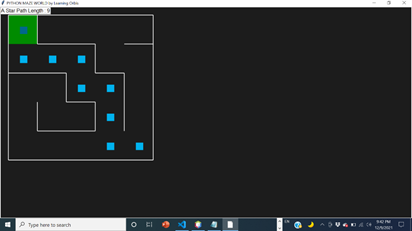

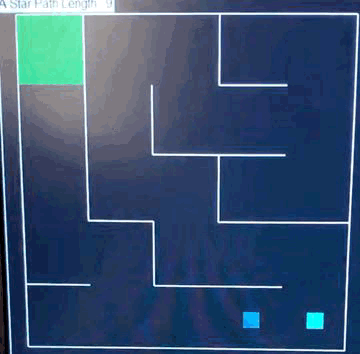

• المراجع

# **References:**
[1]
B. Roy, “A-Star (A*) Search Algorithm - Towards Data Science,” Medium, Sep. 29, 2019. https://towardsdatascience.com/a-star-a-search-algorithm-eb495fb156bb (accessed Dec. 10, 2021).

[2]
“Informed Search Algorithms in AI - Javatpoint,” www.javatpoint.com, 2011. https:// www.javatpoint.com/ai-informed-search-algorithms (accessed Dec. 10, 2021).

[3]
“Rat in a Maze Problem,” Tutorialspoint.com, 2018. https://www.tutorialspoint.com/Rat-in-a-Maze-Problem (accessed Dec. 10, 2021).

[4]
Muhammad Ahsan Naeem, “A Python Module for Maze Search Algorithms - Towards Data Science,” Medium, Sep. 15, 2021. https://towardsdatascience.com/a-python-module-for-maze-search-algorithms-64e7d1297c96 (accessed Dec. 10, 2021).
‌

[5]
Muhammad Ahsan Naeem, “A-Star (A*) Search for Solving a Maze using Python (with visualization),” Medium, Oct. 18, 2021. https://levelup.gitconnected.com/a-star-a-search-for-solving-a-maze-using-python-with-visualization-b0cae1c3ba92 (accessed Dec. 10, 2021).
‌
‌
